In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [3]:
gas=pd.read_csv("C:\\Users\\prasa\\Downloads\\gas_turbines.csv")
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
gas.shape

(15039, 11)

In [5]:
gas.isnull().values.any() # No Missing values

False

In [6]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
gas.duplicated().values.any()  # False means No duplicate values

False

In [8]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

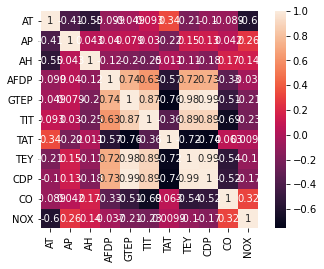

In [9]:
c=gas.corr()
sns.heatmap(c, vmax=1, square=True, annot= True)

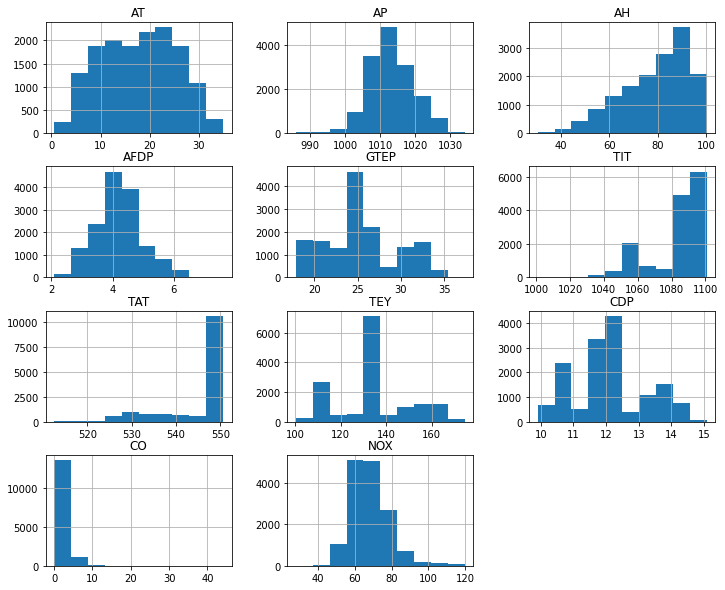

In [10]:
gas.hist(figsize=(12,10))
plt.show()

In [11]:
x = gas.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gas.loc[:,['TEY']]

In [12]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [13]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [15]:
y

array([[-1.23117246],
       [-1.22990897],
       [-1.23054071],
       ...,
       [-1.5160891 ],
       [-1.48134317],
       [-1.42827666]])

In [16]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [17]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Activation,Layer,Lambda
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [18]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    adam=Adam()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=   7.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=   8.2s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=   8.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=   8.2s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=   7.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [20]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 50}
0.0,0.0 with: {'batch_size': 10, 'epochs': 100}
0.0,0.0 with: {'batch_size': 20, 'epochs': 10}
0.0,0.0 with: {'batch_size': 20, 'epochs': 50}
0.0,0.0 with: {'batch_size': 20, 'epochs': 100}
0.0,0.0 with: {'batch_size': 40, 'epochs': 10}
0.0,0.0 with: {'batch_size': 40, 'epochs': 50}
0.0,0.0 with: {'batch_size': 40, 'epochs': 100}


## Tuning of Hyperparameters:- Learning rate and Drop out rate

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model= Sequential()
    model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer= 'normal')) 
    adam= Adam(learning_rate= learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam)
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=   1.9s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=   1.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=   2.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=   1.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=   1.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END d

In [23]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [24]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=   0.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=   0.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=   0.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=   0.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=   0.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal.............

[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=   0.0s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=   0.0s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=   0.0s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=   0.0s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=   0.0s
[CV 5/5; 11/12] START activation_function=linea

ValueError: in user code:

    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_152 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 10)


In [25]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [26]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 8,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=   0.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ...........neuron1=4, neuron2=4

ValueError: in user code:

    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\prasa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_198 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 10)


In [27]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### Training model with optimum values of Hyperparameters

In [28]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

In [29]:
def create_model():
    model= Sequential()
    model.add(Dense(16, input_dim=10, kernel_initializer= 'normal', activation='linear'))
    model.add(Dropout(0))
    model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
    model.add(Dropout(0))
    model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
    model.add(Dropout(0))
    model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
    adam= Adam(learning_rate= 0.001)
# Compile model
    model.compile(loss='mean_squared_error', optimizer=adam)
    return model

# Define regression model
model= KerasRegressor(build_fn=create_model, verbose=10, batch_size=10, epochs=10)
# Fitting model
estimator= model.fit(x,y)
kfold= KFold(n_splits=10, random_state=1, shuffle=True)
results= cross_val_score(model, x,y, cv= kfold)
print('mse:', results.mean())

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
E

In [30]:
print('MSE',results.mean())


MSE -0.0024215974379330875
